In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt


--2022-06-24 10:07:02--  https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 173.194.192.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘irish-lyrics-eof.txt’

irish-lyrics-eof.tx 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2022-06-24 10:07:02 (127 MB/s) - ‘irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
data = open('./irish-lyrics-eof.txt').read()
corpus = data.lower().split('\n')
print(corpus)

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay', 'he gave it to me to keep me reminded', 'of when he stole my thyme away', 'sleep, my child, and peace attend thee', 'all through the night', 'guardian angels god will send thee', 'soft the drowsy hours are creeping', 'hill and dale in slumber sleeping', 'i my loving vigil keeping', 'while the moon her watch is keeping', 'while the weary world is sleeping', 'oer thy spirit gently stealing', 'visions of delight revealing', 'breathes a pure 

In [ ]:
tokeniser = Tokenizer()
tokeniser.fit_on_texts(corpus)
total_words = len(tokeniser.word_index) + 1

print(f'Word Index Dictionary: {tokeniser.word_index}')
print(f'Total words: {total_words}')

Word Index Dictionary: {'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'thro

In [ ]:
input_sequences = []

for line in corpus:
  token_list = tokeniser.texts_to_sequences([line])[0]

  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]

    input_sequences.append(n_gram_sequence)

max_seq_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

xs, labels = input_sequences[:, :-1], input_sequences[:, -1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence:
  token_list.append(tokeniser.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['come', 'all', 'ye', 'maidens', 'young', 'and', 'fair']
[51, 12, 96, 1217, 48, 2, 69]


In [ ]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokeniser.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
decoded to text: ['come all ye maidens young and']
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 69


In [ ]:
# Pick element
elem_number = 4

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokeniser.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0    0   51   12   96 1217
   48]
decoded to text: ['come all ye maidens young']
one-hot label: [0. 0. 1. ... 0. 0. 0.]
index of label: 2


In [ ]:
# Hyperparameters
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

# Build the model
model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_seq_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           269000    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 2690)              809690    
                                                                 
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 100
history = model.fit(xs, ys, epochs=epochs)

Epoch 1/100
377/377 [==============================] - 11s 8ms/step - loss: 6.6443 - accuracy: 0.0748
Epoch 2/100
377/377 [==============================] - 3s 8ms/step - loss: 5.7776 - accuracy: 0.1126
Epoch 3/100
377/377 [==============================] - 3s 8ms/step - loss: 4.9053 - accuracy: 0.1643
Epoch 4/100
377/377 [==============================] - 3s 8ms/step - loss: 3.9755 - accuracy: 0.2400
Epoch 5/100
377/377 [==============================] - 3s 8ms/step - loss: 3.1230 - accuracy: 0.3361
Epoch 6/100
377/377 [==============================] - 3s 8ms/step - loss: 2.4278 - accuracy: 0.4559
Epoch 7/100
377/377 [==============================] - 3s 8ms/step - loss: 1.9517 - accuracy: 0.5425
Epoch 8/100
377/377 [==============================] - 3s 8ms/step - loss: 1.5470 - accuracy: 0.6304
Epoch 9/100
377/377 [==============================] - 3s 8ms/step - loss: 1.2811 - accuracy: 0.6943
Epoch 10/100
377/377 [==============================] - 3s 8ms/step - loss: 1.1399 - accur

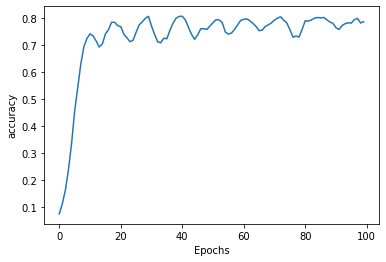

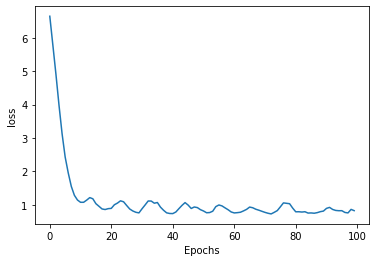

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
seed = "help me obi-wan kinobi youre my only hope"

next_words = 100

for _ in range(next_words):
  token_list = tokeniser.texts_to_sequences([seed])[0]
  token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')

  probabilities = model.predict(token_list)

  predicted = np.argmax(probabilities, axis=-1)[0]

  if predicted != 0:
    output_word = tokeniser.index_word[predicted]
    seed += " " + output_word

print(seed)

help me obi-wan kinobi youre my only hope ago satisfaction on the time will come back gone love love love love me i love love love love love love til scarce had gone i love love love love love love love love love love love love your i love i love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love love


In [ ]:
seed = "help me obi-wan kinobi youre my only hope"

next_words = 100

for _ in range(next_words):
  token_list = tokeniser.texts_to_sequences([seed])[0]
  token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')

  probabilities = model.predict(token_list)

  choice = np.random.choice([1,2,3])
  predicted = np.argsort(probabilities)[0][-choice]

  if predicted != 0:
    output_word = tokeniser.index_word[predicted]
    seed += " " + output_word

print(seed)

help me obi-wan kinobi youre my only hope up by a night i mellow weeks i love love shall toe alive corn i right them have i was rocky lucan was bride on roam my foot eyes i sat with love love sends till i eyes gone glass land chieftains silver slaughter love i remind i love on her love an back up i slept gone sure love i eyes guril love i love love can love i tree at the energy newborn ghosts has sure love gone i i never took em the love on love who i here gone by i gone i love till love
